Imports

In [1]:
import numpy as np
import netCDF4 as nc
import pandas as pd
import datetime
import itertools
from sklearn.linear_model import Ridge
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
import csv
import sklearn.preprocessing

Load one of the files for solar radiation measurements; the last variables contains the measurement

In [2]:
X = nc.Dataset('../data/kaggle_solar/train/dswrf_sfc_latlon_subset_19940101_20071231.nc','r+').variables.values()

Values for X are 5113 times values, 9 latitudes, 16 longitudes, 11 ensemble models, and 5 measurement times.
The values functions pulls the results out of the OrderedDict

In [3]:
solar_rad = X[-1]

Some of the latitude and longitude measurements aren't relevant

In [4]:
solar_array = solar_rad[:,:,:,:,:]

In [5]:
solar_array.shape

(5113, 11, 5, 9, 16)

In [6]:
reduced_solar = np.mean(solar_array,axis=1)

In [7]:
reduced_solar.shape

(5113, 5, 9, 16)

In [8]:
np.prod(reduced_solar.shape[0:2])

25565

In [9]:
expand_solar = reduced_solar.reshape(np.prod(reduced_solar.shape[:1]),np.prod(reduced_solar.shape[1:]))

In [10]:
expand_solar

array([[   0.        ,    0.        ,    0.        , ...,  154.54545593,
         125.45454407,  106.36363983],
       [   0.        ,    0.        ,    0.        , ...,   98.1818161 ,
         110.90908813,  108.1818161 ],
       [   0.        ,    0.        ,    0.        , ...,  173.3636322 ,
         142.3636322 ,  173.45454407],
       ..., 
       [   0.        ,    0.        ,    0.        , ...,  260.        ,
         250.        ,  240.        ],
       [   0.        ,    0.        ,    0.        , ...,  203.6363678 ,
         213.6363678 ,  223.6363678 ],
       [   0.        ,    0.        ,    0.        , ...,  124.54545593,
         106.36363983,  113.63636017]], dtype=float32)

In [11]:
solar_df = pd.DataFrame(expand_solar)
solar_df

,0,1,2,3,4,5,6,7,8,9,...,710,711,712,713,714,715,716,717,718,719
0,0,0,0,0,0,0,0,0,0,0,...,288.181824,288.181824,280.000000,279.090912,272.727264,261.818176,215.454544,154.545456,125.454544,106.363640
1,0,0,0,0,0,0,0,0,0,0,...,280.909088,190.909088,143.636368,130.909088,81.818184,53.636364,62.727272,98.181816,110.909088,108.181816
2,0,0,0,0,0,0,0,0,0,0,...,232.454544,221.090912,206.454544,187.818176,184.272720,204.000000,211.000000,173.363632,142.363632,173.454544
3,0,0,0,0,0,0,0,0,0,0,...,298.545441,293.090912,291.000000,285.818176,277.181824,270.545441,256.909088,250.818176,240.363632,251.272720
4,0,0,0,0,0,0,0,0,0,0,...,230.909088,248.181824,259.090912,247.272720,227.272720,215.454544,204.545456,205.454544,204.545456,204.545456
5,0,0,0,0,0,0,0,0,0,0,...,230.909088,213.636368,190.000000,160.000000,121.818184,100.000000,108.181816,114.545456,106.363640,104.545456
6,0,0,0,0,0,0,0,0,0,0,...,320.363647,311.181824,309.363647,304.454559,300.090912,298.272736,289.454559,288.272736,279.909088,270.727264
7,0,0,0,0,0,0,0,0,0,0,...,320.000000,309.818176,300.545441,299.727264,290.727264,289.636353,280.454559,279.272736,266.545441,260.818176
8,0,0,0,0,0,0,0,0,0,0,...,319.272736,299.909088,278.363647,262.181824,250.818176,229.272720,210.818176,199.636368,198.727280,212.727280
9,0,0,0,0,0,0,0,0,0,0,...,320.000000,310.000000,294.545441,209.090912,134.545456,104.545456,98.181816,76.363640,52.727272,40.909092


In [12]:
solar_df['time']= pd.to_datetime(X[1][:], format="%Y%m%d%H")

In [13]:
solar_df.set_index('time', inplace=True)

In [14]:
list_of_headers = [[str(int(val)) for val in (list(my_row))] for my_row in list(itertools.product(X[5][:],X[2][:],X[3][:]))]

In [15]:
col_names = ["dswrf_sfc_Time_%s_Lat_%s_Lon_%s"%(my_row[0],my_row[1],my_row[2]) for my_row in list_of_headers]

In [16]:
solar_df.rename(columns=dict(zip(solar_df.columns,col_names)),inplace=True)

In [17]:
solar_df.describe()

,dswrf_sfc_Time_12_Lat_31_Lon_254,dswrf_sfc_Time_12_Lat_31_Lon_255,dswrf_sfc_Time_12_Lat_31_Lon_256,dswrf_sfc_Time_12_Lat_31_Lon_257,dswrf_sfc_Time_12_Lat_31_Lon_258,dswrf_sfc_Time_12_Lat_31_Lon_259,dswrf_sfc_Time_12_Lat_31_Lon_260,dswrf_sfc_Time_12_Lat_31_Lon_261,dswrf_sfc_Time_12_Lat_31_Lon_262,dswrf_sfc_Time_12_Lat_31_Lon_263,...,dswrf_sfc_Time_24_Lat_39_Lon_260,dswrf_sfc_Time_24_Lat_39_Lon_261,dswrf_sfc_Time_24_Lat_39_Lon_262,dswrf_sfc_Time_24_Lat_39_Lon_263,dswrf_sfc_Time_24_Lat_39_Lon_264,dswrf_sfc_Time_24_Lat_39_Lon_265,dswrf_sfc_Time_24_Lat_39_Lon_266,dswrf_sfc_Time_24_Lat_39_Lon_267,dswrf_sfc_Time_24_Lat_39_Lon_268,dswrf_sfc_Time_24_Lat_39_Lon_269
count,5113,5113,5113,5113,5113,5113,5113,5113.000000,5113.000000,5113.000000,...,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000
mean,0,0,0,0,0,0,0,0.004694,0.011895,0.023523,...,524.851807,510.319733,496.219086,483.834351,471.829834,460.061859,449.432343,443.418976,435.682709,428.744476
std,0,0,0,0,0,0,0,0.058963,0.092174,0.131998,...,197.999181,198.473766,199.417129,199.630039,199.516045,199.699755,199.404514,199.354829,197.160517,195.281318
min,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,25.818182,24.000000,22.181818,22.727272,13.636364,11.818182,15.454545,15.909091,20.909090,20.909090
25%,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,339.181824,326.909088,313.636353,304.000000,295.363647,282.636353,273.363647,268.818176,261.272736,256.272736
50%,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,538.818176,520.454529,503.818176,486.090912,473.545441,460.000000,449.000000,445.727264,437.454559,432.272736
75%,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,711.727295,699.545471,686.363647,674.909119,660.636353,650.727295,639.000000,634.363647,621.818176,614.545471
max,0,0,0,0,0,0,0,1.000000,1.000000,1.000000,...,839.181824,819.818176,808.727295,800.000000,791.090881,779.909119,779.454529,770.363647,752.363647,739.454529


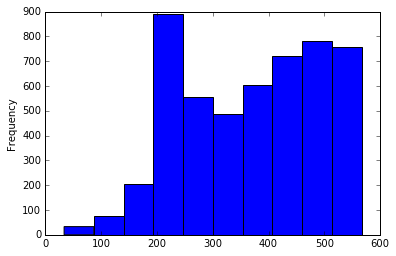

In [38]:
%matplotlib inline
solar_df.dswrf_sfc_Time_18_Lat_31_Lon_254.plot(kind='hist')

In [ ]:
solar_df.Time_24_Lat_31_Lon_268.plot(kind='hist')

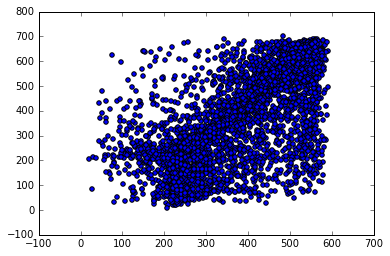

In [40]:
import matplotlib.pyplot as plt
plt.scatter(solar_df.dswrf_sfc_Time_18_Lat_31_Lon_257,solar_df.dswrf_sfc_Time_18_Lat_39_Lon_268)

Need to label by the incoming data type, the time, the location, potentially the model

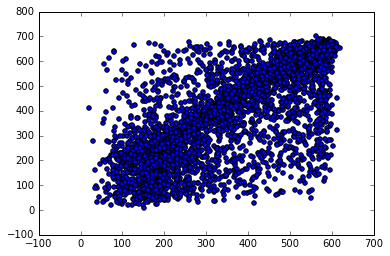

In [42]:
plt.scatter(solar_df.dswrf_sfc_Time_18_Lat_39_Lon_257,solar_df.dswrf_sfc_Time_18_Lat_39_Lon_268)

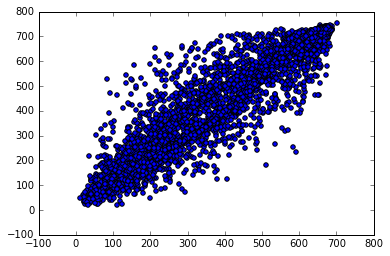

In [43]:
plt.scatter(solar_df.dswrf_sfc_Time_18_Lat_39_Lon_268,solar_df.dswrf_sfc_Time_24_Lat_39_Lon_268)

## Over the next 5 hours, keep walking through the benchmark-- add another two files and go through the rest of the analysis. If there is still time, read through the suggested articles from the previous class

#### First, add another file

In [54]:
X2 = nc.Dataset('../data/kaggle_solar/train/dlwrf_sfc_latlon_subset_19940101_20071231.nc','r+').variables.values()
solar_rad_long = X2[-1]
solar_array_long = solar_rad_long[:,:,:,:,:]
reduced_solar_long = np.mean(solar_array_long,axis=1)
expand_solar_long = reduced_solar_long.reshape(np.prod(reduced_solar_long.shape[:1]),np.prod(reduced_solar_long.shape[1:]))
solar_df_long = pd.DataFrame(expand_solar_long)
solar_df_long['time']= pd.to_datetime(X[1][:], format="%Y%m%d%H")
solar_df_long.set_index('time', inplace=True)
list_of_headers2 = [[str(int(val)) for val in (list(my_row))] for my_row in list(itertools.product(X2[5][:],X2[2][:],X2[3][:]))]
col_names2 = ["dlwrf_sfc_Time_%s_Lat_%s_Lon_%s"%(my_row[0],my_row[1],my_row[2]) for my_row in list_of_headers2]
solar_df_long.rename(columns=dict(zip(solar_df_long.columns,col_names2)),inplace=True)

In [88]:
solar_df_all = pd.concat([solar_df, solar_df_long], axis=1)

In [91]:
solar_df_all

,dswrf_sfc_Time_12_Lat_31_Lon_254,dswrf_sfc_Time_12_Lat_31_Lon_255,dswrf_sfc_Time_12_Lat_31_Lon_256,dswrf_sfc_Time_12_Lat_31_Lon_257,dswrf_sfc_Time_12_Lat_31_Lon_258,dswrf_sfc_Time_12_Lat_31_Lon_259,dswrf_sfc_Time_12_Lat_31_Lon_260,dswrf_sfc_Time_12_Lat_31_Lon_261,dswrf_sfc_Time_12_Lat_31_Lon_262,dswrf_sfc_Time_12_Lat_31_Lon_263,...,dlwrf_sfc_Time_24_Lat_39_Lon_260,dlwrf_sfc_Time_24_Lat_39_Lon_261,dlwrf_sfc_Time_24_Lat_39_Lon_262,dlwrf_sfc_Time_24_Lat_39_Lon_263,dlwrf_sfc_Time_24_Lat_39_Lon_264,dlwrf_sfc_Time_24_Lat_39_Lon_265,dlwrf_sfc_Time_24_Lat_39_Lon_266,dlwrf_sfc_Time_24_Lat_39_Lon_267,dlwrf_sfc_Time_24_Lat_39_Lon_268,dlwrf_sfc_Time_24_Lat_39_Lon_269
time,,,,,,,,,,,,,,,,,,,,,
1994-01-01,0,0,0,0,0,0,0,0,0,0,...,251.286560,248.468369,244.559280,241.195648,238.286560,238.832016,253.104736,276.468384,285.013824,296.377472
1994-01-02,0,0,0,0,0,0,0,0,0,0,...,246.838150,285.929077,300.747253,299.292694,302.929077,308.201782,307.929077,302.383606,296.292694,295.383606
1994-01-03,0,0,0,0,0,0,0,0,0,0,...,282.840149,277.476532,268.749237,269.931061,270.749237,263.021973,260.476532,275.294708,289.203796,283.021973
1994-01-04,0,0,0,0,0,0,0,0,0,0,...,240.531311,233.804047,227.258591,224.258591,222.713135,224.076767,230.985855,237.622223,244.894958,229.258591
1994-01-05,0,0,0,0,0,0,0,0,0,0,...,308.209198,291.572845,273.754669,271.754669,274.027374,277.936493,281.118286,279.300110,275.300110,271.481934
1994-01-06,0,0,0,0,0,0,0,0,0,0,...,251.197525,244.652084,245.015717,251.015717,259.924805,269.742981,277.833893,285.288452,294.379364,303.742981
1994-01-07,0,0,0,0,0,0,0,0,0,0,...,213.599701,208.599701,199.236069,189.508789,181.690613,175.963333,172.145157,170.145157,170.599701,172.054245
1994-01-08,0,0,0,0,0,0,0,0,0,0,...,234.399963,239.218155,236.581787,229.218155,220.763611,214.127243,208.127243,203.854507,202.763611,203.490875
1994-01-09,0,0,0,0,0,0,0,0,0,0,...,224.970901,233.152740,241.516373,244.152740,243.061829,244.970932,249.243652,253.061813,253.879990,248.607269


In [92]:
solar_df_all.describe()

,dswrf_sfc_Time_12_Lat_31_Lon_254,dswrf_sfc_Time_12_Lat_31_Lon_255,dswrf_sfc_Time_12_Lat_31_Lon_256,dswrf_sfc_Time_12_Lat_31_Lon_257,dswrf_sfc_Time_12_Lat_31_Lon_258,dswrf_sfc_Time_12_Lat_31_Lon_259,dswrf_sfc_Time_12_Lat_31_Lon_260,dswrf_sfc_Time_12_Lat_31_Lon_261,dswrf_sfc_Time_12_Lat_31_Lon_262,dswrf_sfc_Time_12_Lat_31_Lon_263,...,dlwrf_sfc_Time_24_Lat_39_Lon_260,dlwrf_sfc_Time_24_Lat_39_Lon_261,dlwrf_sfc_Time_24_Lat_39_Lon_262,dlwrf_sfc_Time_24_Lat_39_Lon_263,dlwrf_sfc_Time_24_Lat_39_Lon_264,dlwrf_sfc_Time_24_Lat_39_Lon_265,dlwrf_sfc_Time_24_Lat_39_Lon_266,dlwrf_sfc_Time_24_Lat_39_Lon_267,dlwrf_sfc_Time_24_Lat_39_Lon_268,dlwrf_sfc_Time_24_Lat_39_Lon_269
count,5113,5113,5113,5113,5113,5113,5113,5113.000000,5113.000000,5113.000000,...,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000
mean,0,0,0,0,0,0,0,0.004694,0.011895,0.023523,...,320.481903,323.738495,325.237305,325.020844,324.614838,325.078613,325.710510,326.260590,326.122528,325.944946
std,0,0,0,0,0,0,0,0.058963,0.092174,0.131998,...,62.235705,63.242934,63.815536,63.609507,63.205939,62.932168,62.502453,62.743775,63.088820,62.917789
min,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,157.633026,156.905746,155.342957,150.979324,148.979324,150.070236,150.615692,149.342957,148.433868,146.289413
25%,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,271.055481,272.816284,273.675659,273.892456,273.909302,274.635437,275.766418,277.131256,276.577942,276.686157
50%,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,315.836395,320.629974,323.389435,324.871460,326.039734,328.324829,329.293823,330.562500,330.459442,330.560181
75%,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,375.818176,380.463867,381.843048,381.636810,379.711945,379.043152,379.131836,379.053345,378.448151,377.082703
max,0,0,0,0,0,0,0,1.000000,1.000000,1.000000,...,462.903595,454.630859,456.289185,452.016479,447.925568,446.471008,443.925568,448.764160,448.595734,451.527924


#### Load  in the y values

In [118]:
y_values = pd.read_csv('../data/kaggle_solar/train.csv', parse_dates=[0])

In [119]:
y_values.set_index('Date', inplace=True)

In [163]:
model1 = Ridge(normalize=True)
model2 = neighbors.KNeighborsRegressor(10)

In [ ]:
model2 = neighbors.KNeighborsRegressor

In [155]:
alphas = np.logspace(-4,2,20,base=10)

In [156]:
alphas

array([  1.00000000e-04,   2.06913808e-04,   4.28133240e-04,
         8.85866790e-04,   1.83298071e-03,   3.79269019e-03,
         7.84759970e-03,   1.62377674e-02,   3.35981829e-02,
         6.95192796e-02,   1.43844989e-01,   2.97635144e-01,
         6.15848211e-01,   1.27427499e+00,   2.63665090e+00,
         5.45559478e+00,   1.12883789e+01,   2.33572147e+01,
         4.83293024e+01,   1.00000000e+02])

In [157]:
model1.alpha = alphas[10]
model2.alpha = alphas[10]

In [158]:
cv_splits = 10

In [159]:
X_train, X_cv, y_train, y_cv = train_test_split(solar_df_all, y_values, test_size=0.2, random_state=42)

In [160]:
model1.fit(X_train,y_train)

Ridge(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=None, solver='auto',
   tol=0.001)

In [171]:
x_normed = sklearn.preprocessing.Normalizer(X_train)

In [173]:
x_normed.norm

,dswrf_sfc_Time_12_Lat_31_Lon_254,dswrf_sfc_Time_12_Lat_31_Lon_255,dswrf_sfc_Time_12_Lat_31_Lon_256,dswrf_sfc_Time_12_Lat_31_Lon_257,dswrf_sfc_Time_12_Lat_31_Lon_258,dswrf_sfc_Time_12_Lat_31_Lon_259,dswrf_sfc_Time_12_Lat_31_Lon_260,dswrf_sfc_Time_12_Lat_31_Lon_261,dswrf_sfc_Time_12_Lat_31_Lon_262,dswrf_sfc_Time_12_Lat_31_Lon_263,...,dlwrf_sfc_Time_24_Lat_39_Lon_260,dlwrf_sfc_Time_24_Lat_39_Lon_261,dlwrf_sfc_Time_24_Lat_39_Lon_262,dlwrf_sfc_Time_24_Lat_39_Lon_263,dlwrf_sfc_Time_24_Lat_39_Lon_264,dlwrf_sfc_Time_24_Lat_39_Lon_265,dlwrf_sfc_Time_24_Lat_39_Lon_266,dlwrf_sfc_Time_24_Lat_39_Lon_267,dlwrf_sfc_Time_24_Lat_39_Lon_268,dlwrf_sfc_Time_24_Lat_39_Lon_269
time,,,,,,,,,,,,,,,,,,,,,
2007-05-14,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,381.030853,376.849030,369.303589,368.212677,373.121765,371.394501,365.849030,362.121765,362.485382,361.030853
2001-12-15,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,256.739929,257.649017,266.558105,273.376282,279.830841,287.739929,295.103546,298.921753,299.830841,299.739929
2003-01-03,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,272.346100,271.164276,266.164276,260.527924,254.800644,247.164291,237.164291,225.709732,217.164291,213.437012
2004-09-19,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,417.509644,415.418732,401.600555,379.782349,355.873260,348.873260,356.509613,359.600525,353.509613,349.600525
2007-05-12,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,344.395477,351.850037,359.213654,367.668213,367.122772,366.850037,367.122772,363.759125,357.577301,353.940948
1996-10-15,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,322.119415,338.483032,363.119415,379.119415,373.755768,360.119415,351.755768,348.483032,345.573944,342.392120
2005-12-23,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,290.309265,296.945618,302.854706,305.127441,307.218353,310.945618,309.491089,303.218353,296.945618,293.218353
2002-07-31,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,399.388397,407.661133,413.479309,413.933868,414.842957,413.752045,410.206573,416.479309,426.752045,422.570221
1995-06-02,0,0,0,0,0,0,0,0.363636,0.363636,0.363636,...,365.181610,371.181610,368.817993,364.181610,364.181610,359.999786,357.817993,354.999786,352.727081,354.817993


In [174]:
model2.fit(x_normed.norm,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [129]:
preds1 = model1.predict(X_cv)

In [175]:
preds2 = model2.predict(sklearn.preprocessing.Normalizer(X_cv).norm)

In [132]:
mse1 = mean_squared_error(y_cv, preds1)

In [176]:
mse2 = mean_squared_error(y_cv,preds2)

In [134]:
mse1

10970316138455.285

In [177]:
mse2

14881753984794.199

Load the test data

In [178]:
testX1 = nc.Dataset('../data/kaggle_solar/test/dswrf_sfc_latlon_subset_20080101_20121130.nc','r+').variables.values()
solar_rad_test_short = testX1[-1]
solar_array_short_test = solar_rad_test_short[:,:,:,:,:]
reduced_solar_short_test = np.mean(solar_array_short_test,axis=1)
expand_solar_short_test = reduced_solar_short_test.reshape(np.prod(reduced_solar_short_test.shape[:1]),np.prod(reduced_solar_short_test.shape[1:]))
solar_df_short_test = pd.DataFrame(expand_solar_short_test)
solar_df_short_test['time']= pd.to_datetime(testX1[1][:], format="%Y%m%d%H")
solar_df_short_test.set_index('time', inplace=True)
list_of_headers_test1 = [[str(int(val)) for val in (list(my_row))] for my_row in list(itertools.product(testX1[5][:],testX1[2][:],testX1[3][:]))]
test_names1 = ["dlwrf_sfc_Time_%s_Lat_%s_Lon_%s"%(my_row[0],my_row[1],my_row[2]) for my_row in list_of_headers_test2]
solar_df_short_test.rename(columns=dict(zip(solar_df_short_test.columns,test_names1)),inplace=True)


testX2 = nc.Dataset('../data/kaggle_solar/test/dlwrf_sfc_latlon_subset_20080101_20121130.nc','r+').variables.values()
solar_rad_test_long = testX2[-1]
solar_array_long_test = solar_rad_test_long[:,:,:,:,:]
reduced_solar_long_test = np.mean(solar_array_long_test,axis=1)
expand_solar_long_test = reduced_solar_long_test.reshape(np.prod(reduced_solar_long_test.shape[:1]),np.prod(reduced_solar_long_test.shape[1:]))
solar_df_long_test = pd.DataFrame(expand_solar_long_test)
solar_df_long_test['time']= pd.to_datetime(testX2[1][:], format="%Y%m%d%H")
solar_df_long_test.set_index('time', inplace=True)
list_of_headers_test2 = [[str(int(val)) for val in (list(my_row))] for my_row in list(itertools.product(testX2[5][:],testX2[2][:],testX2[3][:]))]
test_names2 = ["dlwrf_sfc_Time_%s_Lat_%s_Lon_%s"%(my_row[0],my_row[1],my_row[2]) for my_row in list_of_headers_test2]
solar_df_long_test.rename(columns=dict(zip(solar_df_long_test.columns,test_names2)),inplace=True)

In [179]:
solar_df_test_all = pd.concat([solar_df_short_test, solar_df_long_test], axis=1)

In [180]:
preds = model1.predict(solar_df_test_all)

NotFittedError: This Ridge instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [181]:
pred2 = model2.predict(sklearn.preprocessing.Normalizer(solar_df_test_all).norm)

In [183]:
fexample = open('../data/kaggle_solar/sampleSubmission.csv')
fout = open('submission_two.csv', 'wb')
fReader = csv.reader(fexample,delimiter=',',skipinitialspace=True)
fWriter = csv.writer(fout)
for i,row in enumerate(fReader):
    if i == 0:
        fWriter.writerow(row)
    else:
        row[1:] = pred2[i-1]
        fWriter.writerow(row)
fexample.close()
fout.close()

#### One easy simplification is to reduce the number of stations that we are considering based on latitude and longitude. Maybe also ones with similar elevation as well. That could reduce from 9X16 to 8, allowing more variables to be brought in, such as leaving all of the model estimates?

#### And although this works for the analysis, I need to reshape this to move all of the variables into columns so that visualization will be more intuitive. It will need to be transformed back before analysis, though.